In [82]:
from pycaret.regression import * 
import pandas as pd


In [83]:
data = pd.read_csv("train.csv")

In [84]:
data

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,저녁,13.97,287.78,9.84,76.10,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61
1,TRAIN_00001,8,21,오전,16.94,290.85,12.14,73.30,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68
2,TRAIN_00002,11,1,저녁,9.76,283.84,5.40,74.20,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73
3,TRAIN_00003,12,28,오전,5.27,277.30,2.71,83.50,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71
4,TRAIN_00004,9,26,오후,17.35,290.86,12.68,74.00,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,TRAIN_36576,8,10,저녁,14.10,287.79,4.99,54.15,993.53,16.11,8.73,7.39,5.48,1200.85,292.90,0.77
36577,TRAIN_36577,2,20,오전,3.80,277.91,-1.01,70.70,988.03,8.02,5.67,2.35,3.58,1240.06,210.50,8.97
36578,TRAIN_36578,5,29,저녁,20.06,295.10,16.70,81.00,977.90,23.51,19.04,4.47,12.20,1153.24,19.22,2.58
36579,TRAIN_36579,9,10,저녁,25.65,299.81,15.30,52.81,988.39,32.98,17.41,15.56,11.03,1144.61,225.40,0.36


In [85]:
def month_to_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'
data['계절'] = data['월'].apply(month_to_season)


In [91]:
# ignore_features=['절대 온도(K)', '이슬점 온도(°C)', '포화 증기압(mbar)', '실제 증기압(mbar)',
#        '증기압 부족량(mbar)', '수증기 함량 (g/kg)', '공기 밀도 (g/m**3)','ID']
ignore_features=['포화 증기압(mbar)', '이슬점 온도(°C)','수증기 함량 (g/kg)','섭씨 온도(°⁣C)',
       'ID','월']
categorical_features = ['계절','일','측정 시간대']


In [92]:
reg = setup(data, target = '풍속 (m/s)',normalize=True, normalize_method="robust", ignore_features=ignore_features, categorical_features=categorical_features)

,Description,Value
0,Session id,4511
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 17)"
4,Transformed data shape,"(36581, 17)"
5,Transformed train set shape,"(25606, 17)"
6,Transformed test set shape,"(10975, 17)"
7,Ignore features,6
8,Numeric features,7
9,Categorical features,3


In [93]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4178,0.3273,0.5719,0.8621,0.1952,0.3495,1.0540
rf,Random Forest Regressor,0.4779,0.4292,0.6551,0.8192,0.2232,0.4183,2.1540
knn,K Neighbors Regressor,0.4971,0.4819,0.6941,0.7970,0.2315,0.4174,0.0950
xgboost,Extreme Gradient Boosting,0.5691,0.5833,0.7636,0.7544,0.2547,0.4722,0.6890
lightgbm,Light Gradient Boosting Machine,0.6221,0.6729,0.8202,0.7166,0.2730,0.5364,0.3420
dt,Decision Tree Regressor,0.6256,0.8594,0.9264,0.6381,0.3022,0.4896,0.0950
gbr,Gradient Boosting Regressor,0.7871,1.0930,1.0452,0.5401,0.3307,0.6775,1.0680
huber,Huber Regressor,0.9675,1.8477,1.3586,0.2241,0.3946,0.7523,0.0910
ridge,Ridge Regression,0.9928,1.7803,1.3338,0.2517,0.4058,0.8544,0.0560
br,Bayesian Ridge,0.9929,1.7813,1.3342,0.2513,0.4059,0.8544,0.0550


In [94]:
et = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3997,0.3008,0.5484,0.8739,0.1888,0.3427


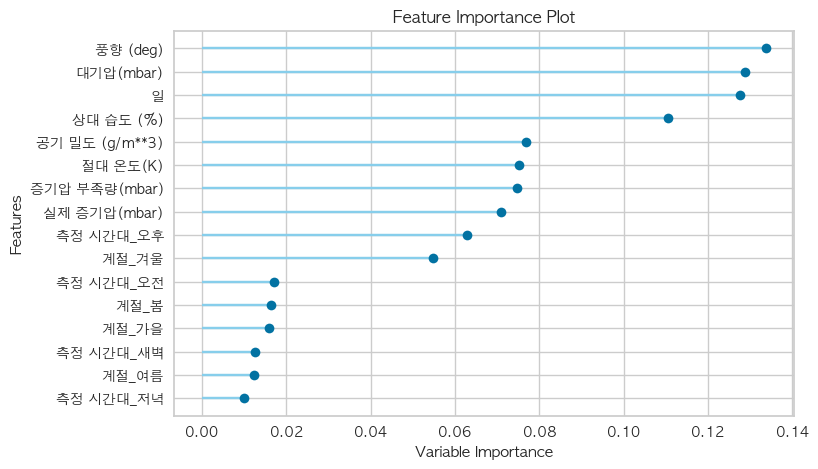

In [95]:
from matplotlib import font_manager,rc
import matplotlib
matplotlib.rc('font',family="AppleGothic")

plot_model(et, plot = 'feature_all')


In [40]:
tuned_et = tune_model(et, optimize = 'MAE', n_iter = 10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:02:58
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
save_model(tuned_et,"tuned_et")